In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
#loading the dataset
df=pd.read_csv("/Users/barsa/Downloads/CloudWatch_Traffic_Web_Attack.csv")
#Display head 5 rows for quick review
df.head(3)

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [223]:
#Dispaly the info od DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [225]:
#convert columns- creation_time & end_time into type datetime format
df["creation_time"]= pd.to_datetime(df["creation_time"])
df["end_time"]= pd.to_datetime(df["end_time"])


In [25]:
#Display basic statistics for numerical columns
print("\nDataset Statistics:")
print(df.describe(include="all"))


Dataset Statistics:
            bytes_in     bytes_out         creation_time  \
count   2.820000e+02  2.820000e+02                   282   
unique           NaN           NaN                    30   
top              NaN           NaN  2024-04-26T09:00:00Z   
freq             NaN           NaN                    17   
mean    1.199390e+06  8.455429e+04                   NaN   
std     4.149312e+06  2.549279e+05                   NaN   
min     4.000000e+01  4.400000e+01                   NaN   
25%     5.381500e+03  1.114200e+04                   NaN   
50%     1.318200e+04  1.379950e+04                   NaN   
75%     3.083300e+04  2.627950e+04                   NaN   
max     2.520779e+07  1.561220e+06                   NaN   

                    end_time         src_ip src_ip_country_code protocol  \
count                    282            282                 282      282   
unique                    30             28                   7        1   
top     2024-04-26T09:10:00Z  

Step 3: Missing Data Check and Homogeneity Testing
- This step ensures the dataset is clean and consistent for reliable analysis.
- We will:
- Identify and handle missing values to maintain data integrity.
- Perform homogeneity tests to evaluate wheather data distribution is consistent across features.




In [29]:
#Display the count of missing values for each column
missing_data=df.isnull().sum()
missing_data

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

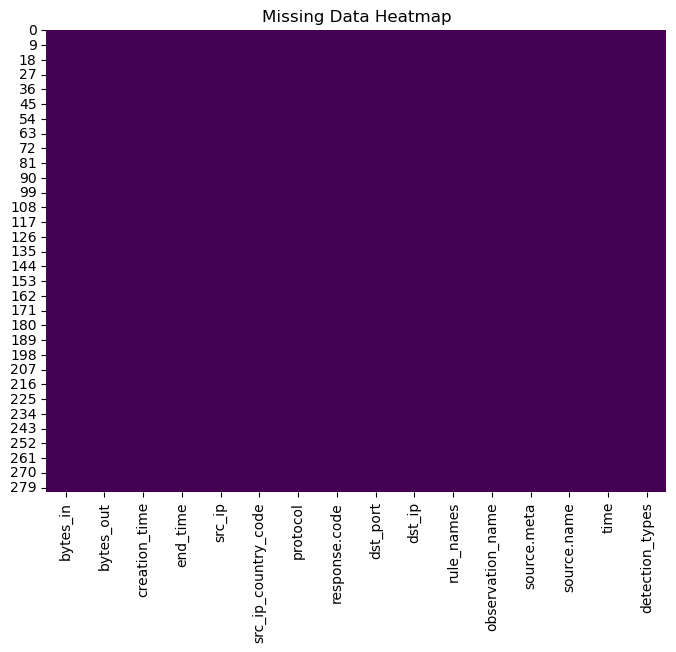

In [35]:
#Display missing data 
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [49]:
#checking for duplicate
duplicate_rows= df.duplicated(keep=False)

#filter the DataFrame to show duplicate rows
duplicates= df[duplicate_rows]

#display the duplicates rows:
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [bytes_in, bytes_out, creation_time, end_time, src_ip, src_ip_country_code, protocol, response.code, dst_port, dst_ip, rule_names, observation_name, source.meta, source.name, time, detection_types]
Index: []


No duplicates found

In [83]:
#to store categorical and numerical column names
categorical_cols=[]
numerical_cols= []

#iteration through each column in the Dataframe
for col in df.columns:
    #check of dtype of column is object, store in categorial_cols list[]
    if df[col].dtype == "object":
        categorical_cols.append(col)
    elif df[col].dtype == "datetime64[ns, UTC]":
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

#print the both categorial and numerical lists
print("Categorial columns:\n", categorical_cols)
print("\nNumerical columns:\n", numerical_cols)

Categorial columns:
 ['creation_time', 'end_time', 'src_ip', 'src_ip_country_code', 'protocol', 'dst_ip', 'rule_names', 'observation_name', 'source.meta', 'source.name', 'time', 'detection_types']

Numerical columns:
 ['bytes_in', 'bytes_out', 'response.code', 'dst_port']


In [87]:
#Apply value_counts() to each categorical feature:
for feature in categorical_cols:
    print(f"Unique values for {feature}:")
    print(df[feature].value_counts())
    print("====================\n")

Unique values for creation_time:
creation_time
2024-04-26 09:00:00+00:00    17
2024-04-26 08:50:00+00:00    13
2024-04-26 09:50:00+00:00    11
2024-04-25 23:20:00+00:00    11
2024-04-26 09:40:00+00:00    11
2024-04-25 23:10:00+00:00    11
2024-04-26 00:40:00+00:00    10
2024-04-26 08:20:00+00:00    10
2024-04-26 01:20:00+00:00    10
2024-04-26 01:00:00+00:00    10
2024-04-25 23:00:00+00:00    10
2024-04-26 01:30:00+00:00    10
2024-04-26 00:10:00+00:00    10
2024-04-25 23:50:00+00:00     9
2024-04-26 01:10:00+00:00     9
2024-04-26 01:40:00+00:00     9
2024-04-26 09:30:00+00:00     9
2024-04-25 23:40:00+00:00     9
2024-04-26 00:30:00+00:00     9
2024-04-26 09:10:00+00:00     9
2024-04-25 23:30:00+00:00     8
2024-04-26 09:20:00+00:00     8
2024-04-26 00:00:00+00:00     8
2024-04-26 08:30:00+00:00     8
2024-04-26 01:50:00+00:00     8
2024-04-26 00:20:00+00:00     8
2024-04-26 08:40:00+00:00     7
2024-04-26 08:10:00+00:00     7
2024-04-26 08:00:00+00:00     7
2024-04-26 00:50:00+00:00

Distribution of bytes_in and bytes-out

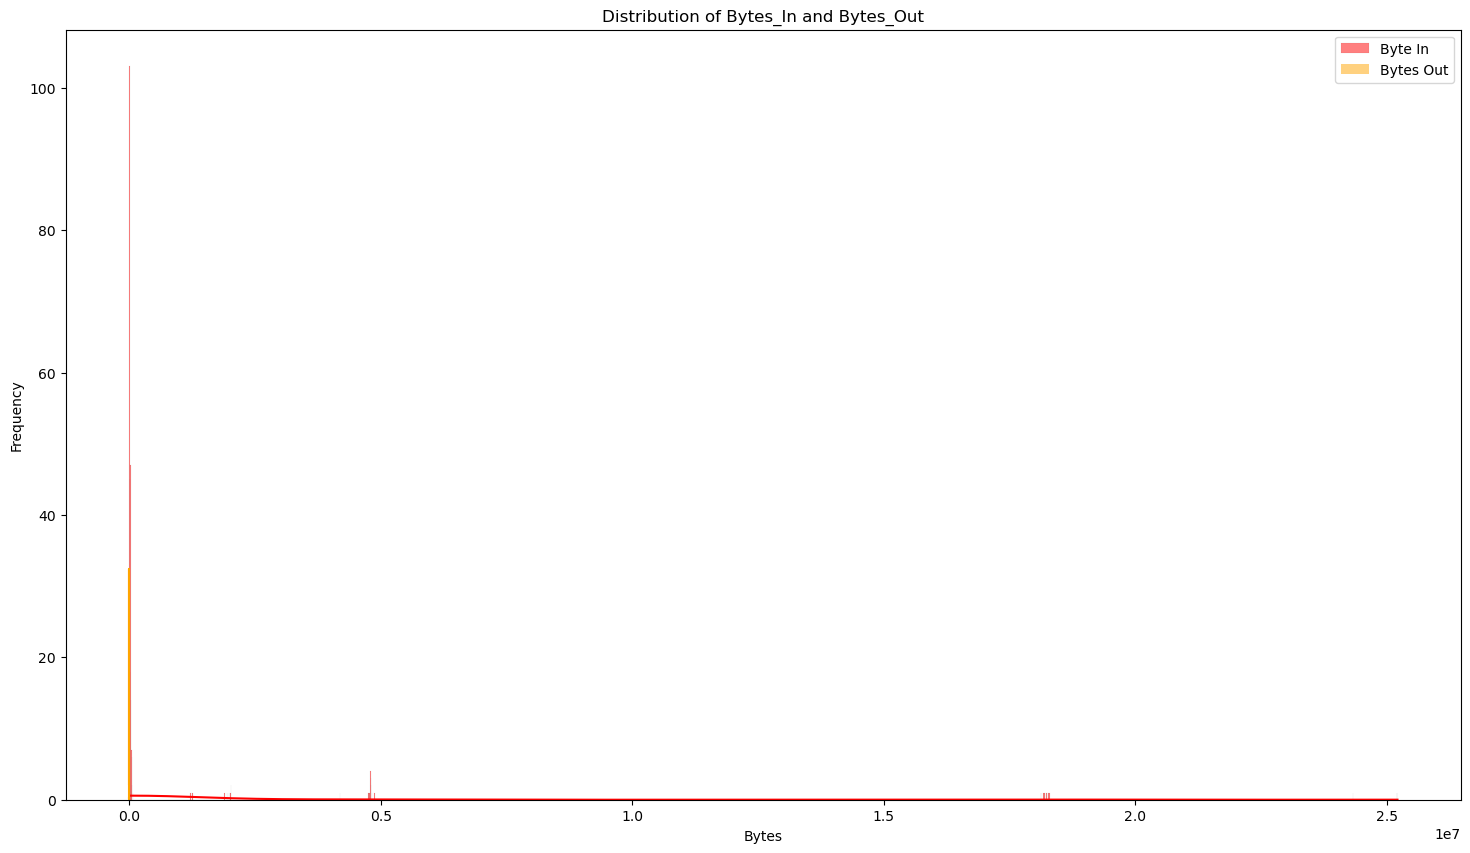

In [97]:
#visulaization bytes_in and bytes_out distribution
plt.figure(figsize=(18,10))
sns.histplot(df["bytes_in"], kde=True, color="red", label="Byte In")
sns.histplot(df["bytes_out"], kde=True, color="orange", label= "Bytes Out")
plt.xlabel("Bytes")
plt.ylabel("Frequency")
plt.title("Distribution of Bytes_In and Bytes_Out")
plt.legend()
plt.show()

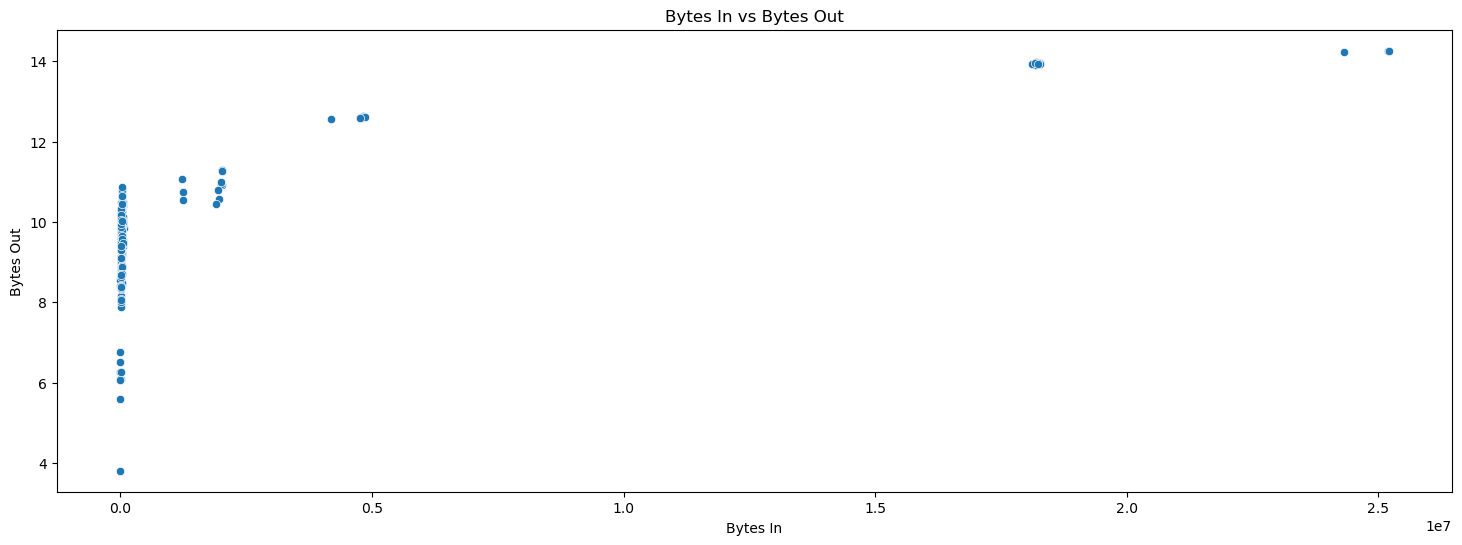

In [101]:
#Visualize bytes_in vs bytes_out
plt.figure(figsize=(18,6))
sns.scatterplot(x="bytes_in", y="bytes_out", data=df)
plt.xlabel("Bytes In")
plt.ylabel("Bytes Out")
plt.title ("Bytes In vs Bytes Out")
plt.show()

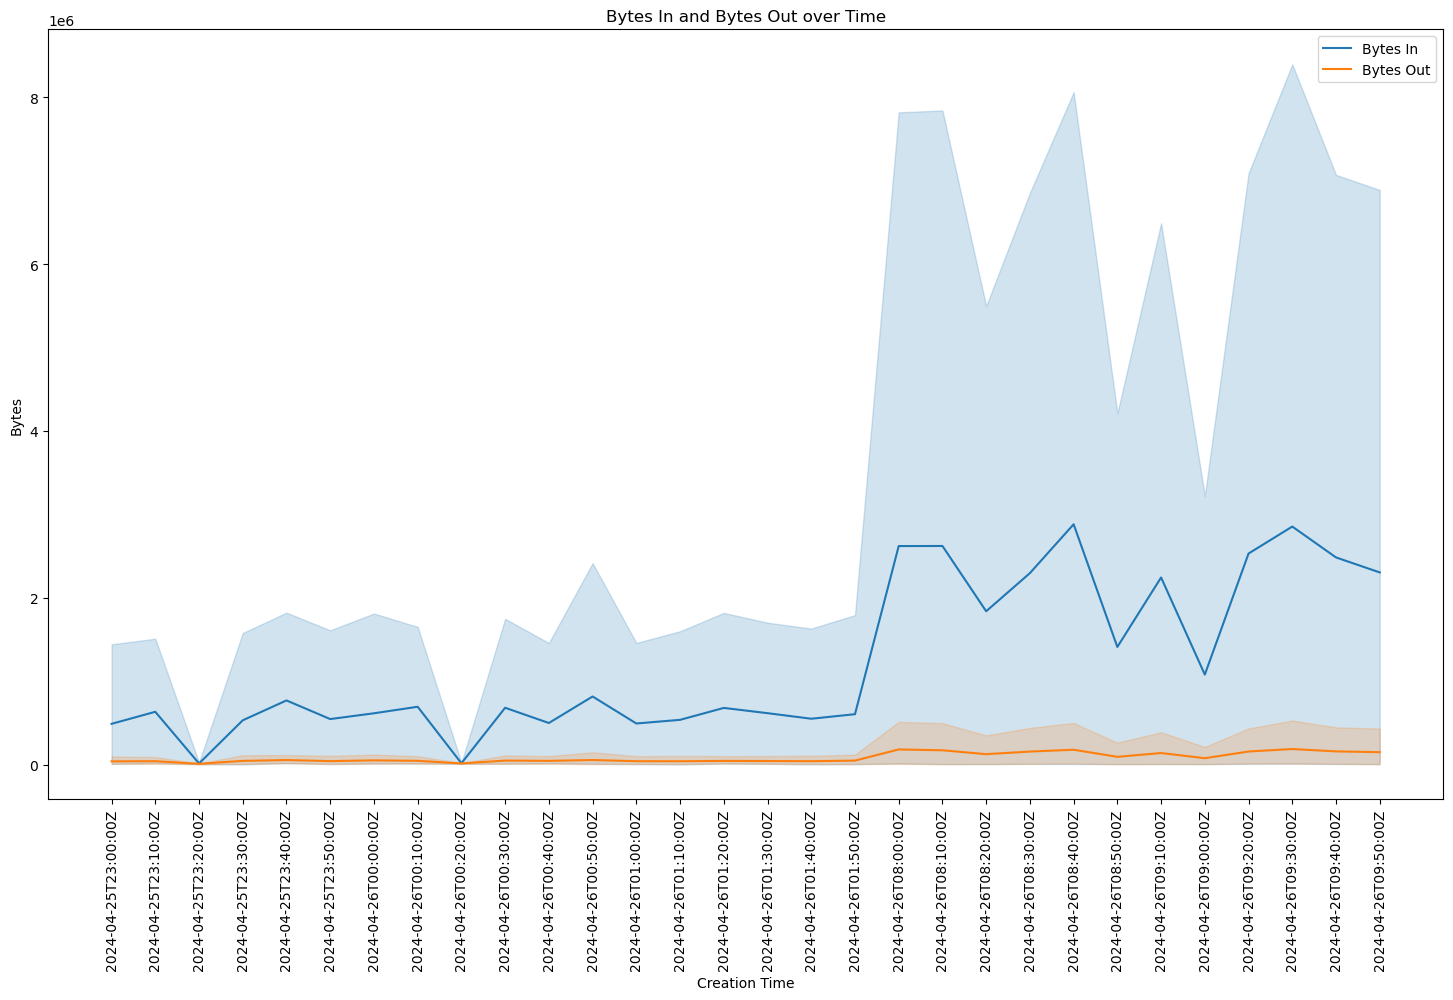

In [185]:
#Visualize byte_in and bytes_out over time
plt.figure(figsize=(18,10))
sns.lineplot(x="creation_time", y="bytes_in", data= df,label="Bytes In")
sns.lineplot(x="creation_time", y="bytes_out", data=df, label="Bytes Out")
plt.xlabel("Creation Time")
plt.ylabel("Bytes")
plt.title("Bytes In and Bytes Out over Time")
plt.xticks(rotation= 90)
plt.legend()
plt.show()

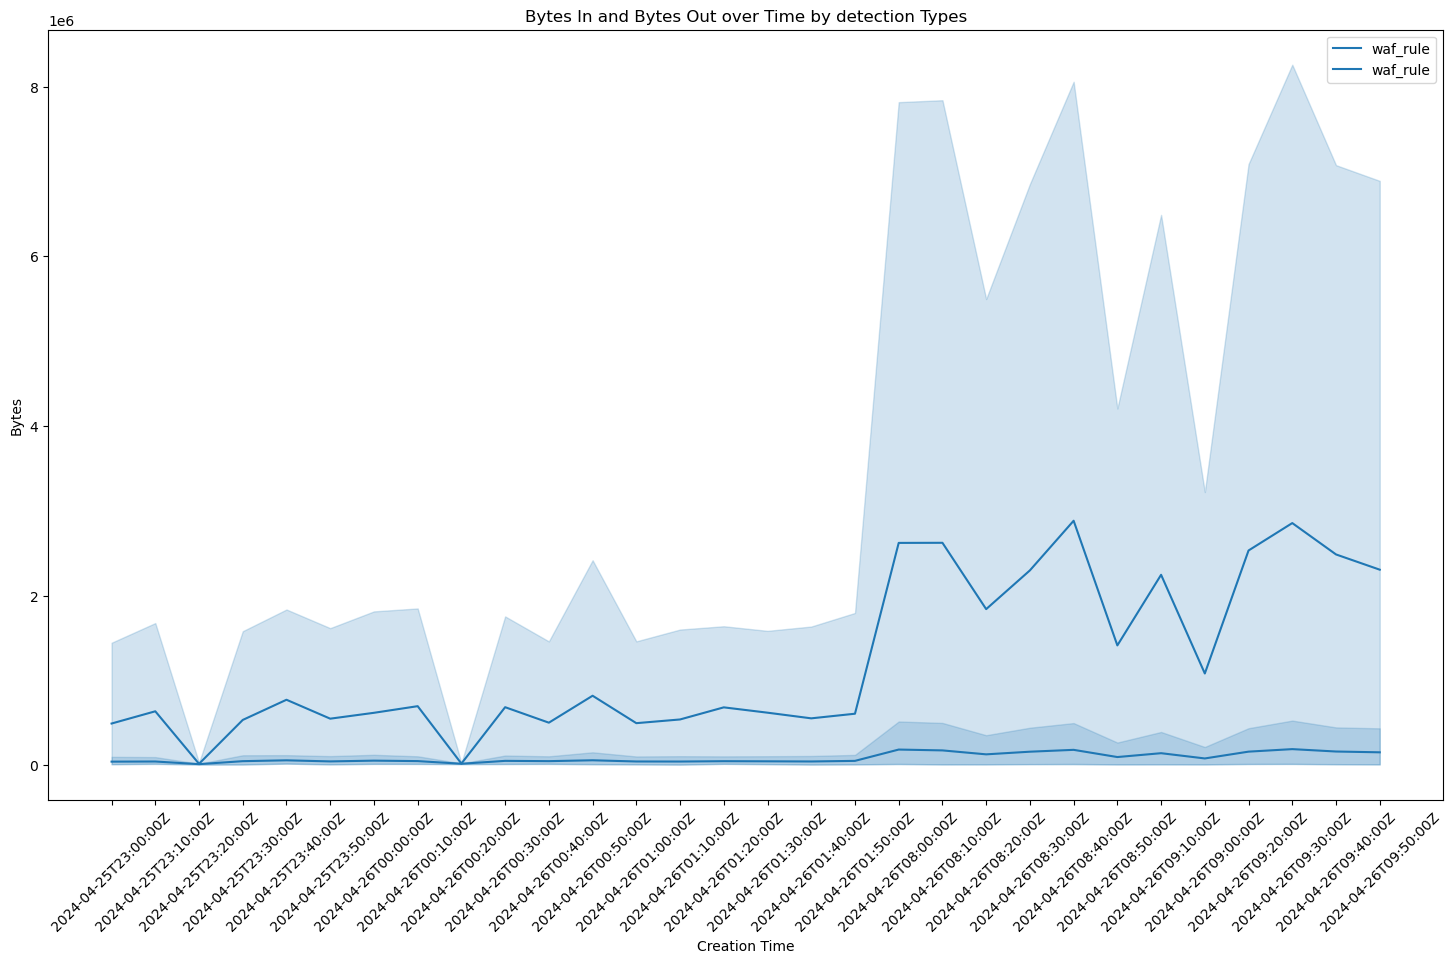

In [201]:
#Visualize byte_in and bytes_out over time by detection types
plt.figure(figsize=(18,10))
sns.lineplot(x="creation_time", y="bytes_in",hue="detection_types", data= df)
sns.lineplot(x="creation_time", y="bytes_out", hue="detection_types",data=df)
plt.xlabel("Creation Time")
plt.ylabel("Bytes")
plt.title("Bytes In and Bytes Out over Time by detection Types")
plt.xticks(rotation= 45)
plt.legend()
plt.show()

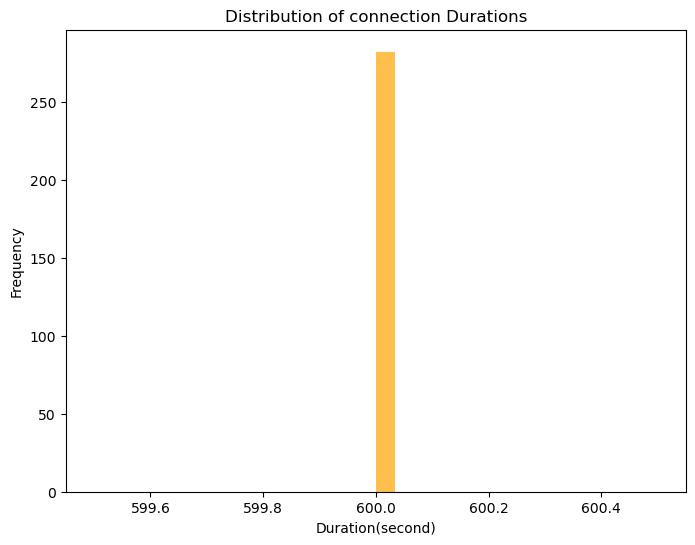

In [229]:

 # Duration of the session in seconds
df['duration'] = (df['end_time']- df['creation_time']).dt.total_seconds()

#plot duration
plt.figure(figsize=(8,6))
plt.hist(df["duration"], bins=30, color="orange", alpha=0.7)
plt.xlabel("Duration(second)")
plt.ylabel("Frequency")
plt.title("Distribution of connection Durations")
plt.show()

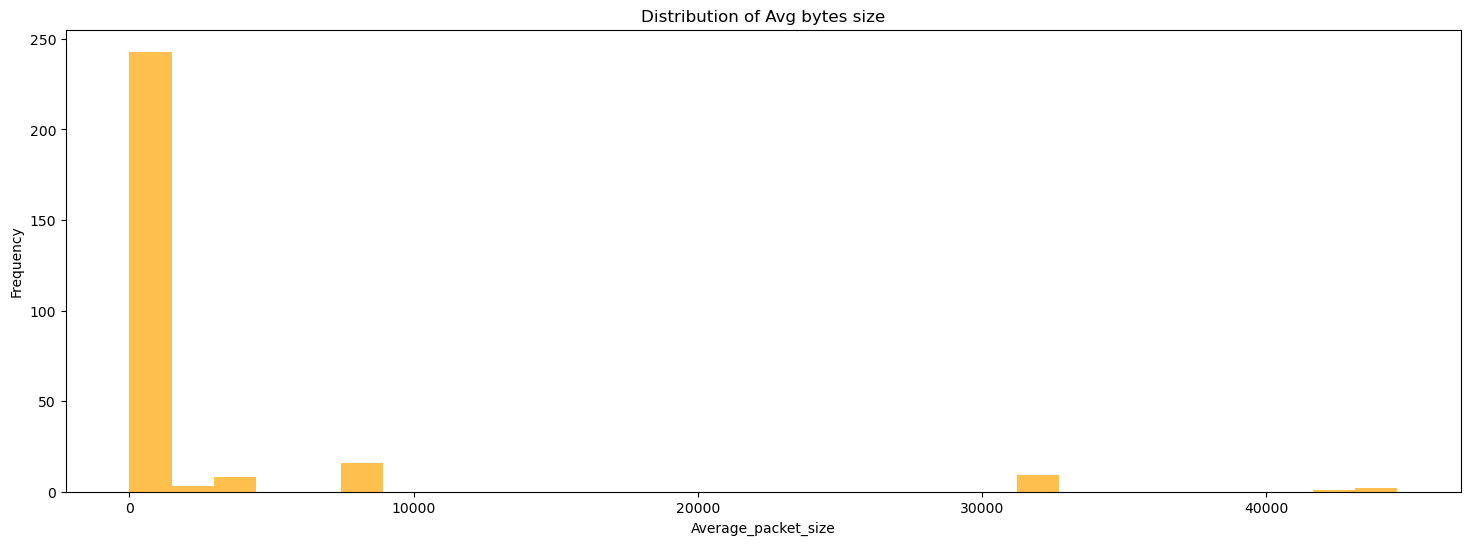

In [239]:
# Average packet size
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) /df['duration']

#plot duration
plt.figure(figsize=(18,6))
plt.hist(df["avg_packet_size"], bins=30, color="orange", alpha=0.7)
plt.xlabel("Average_packet_size")
plt.ylabel("Frequency")
plt.title("Distribution of Avg bytes size")
plt.show()

COUNT OF SUSPICIOUS WEB INTERACTIONS BY TOP SOURCE IP COUNTRIES

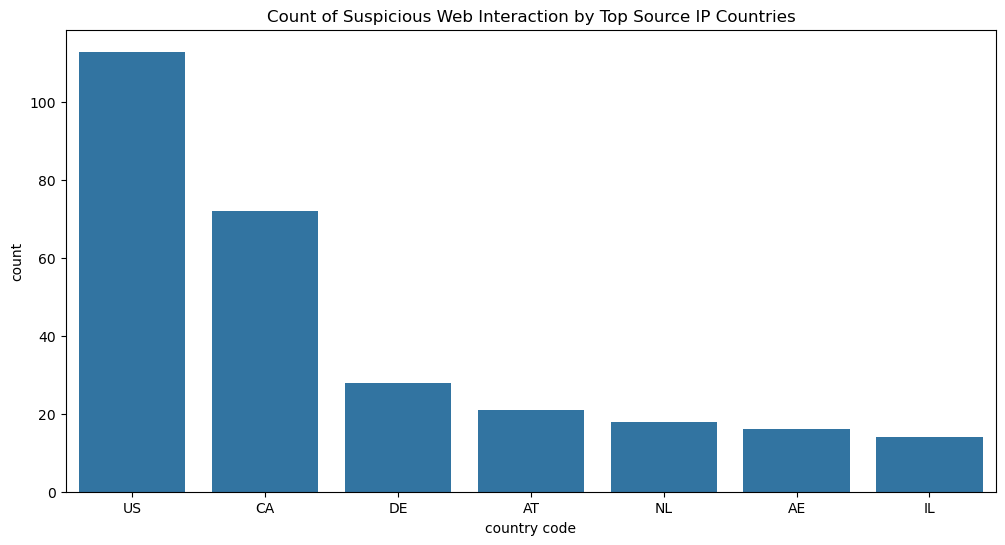

In [129]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["src_ip_country_code"], data=df, order=df["src_ip_country_code"].value_counts().iloc[:10].index)
plt.xlabel("country code")
plt.ylabel("count")
plt.title("Count of Suspicious Web Interaction by Top Source IP Countries")
plt.xticks(rotation=0)
plt.show()

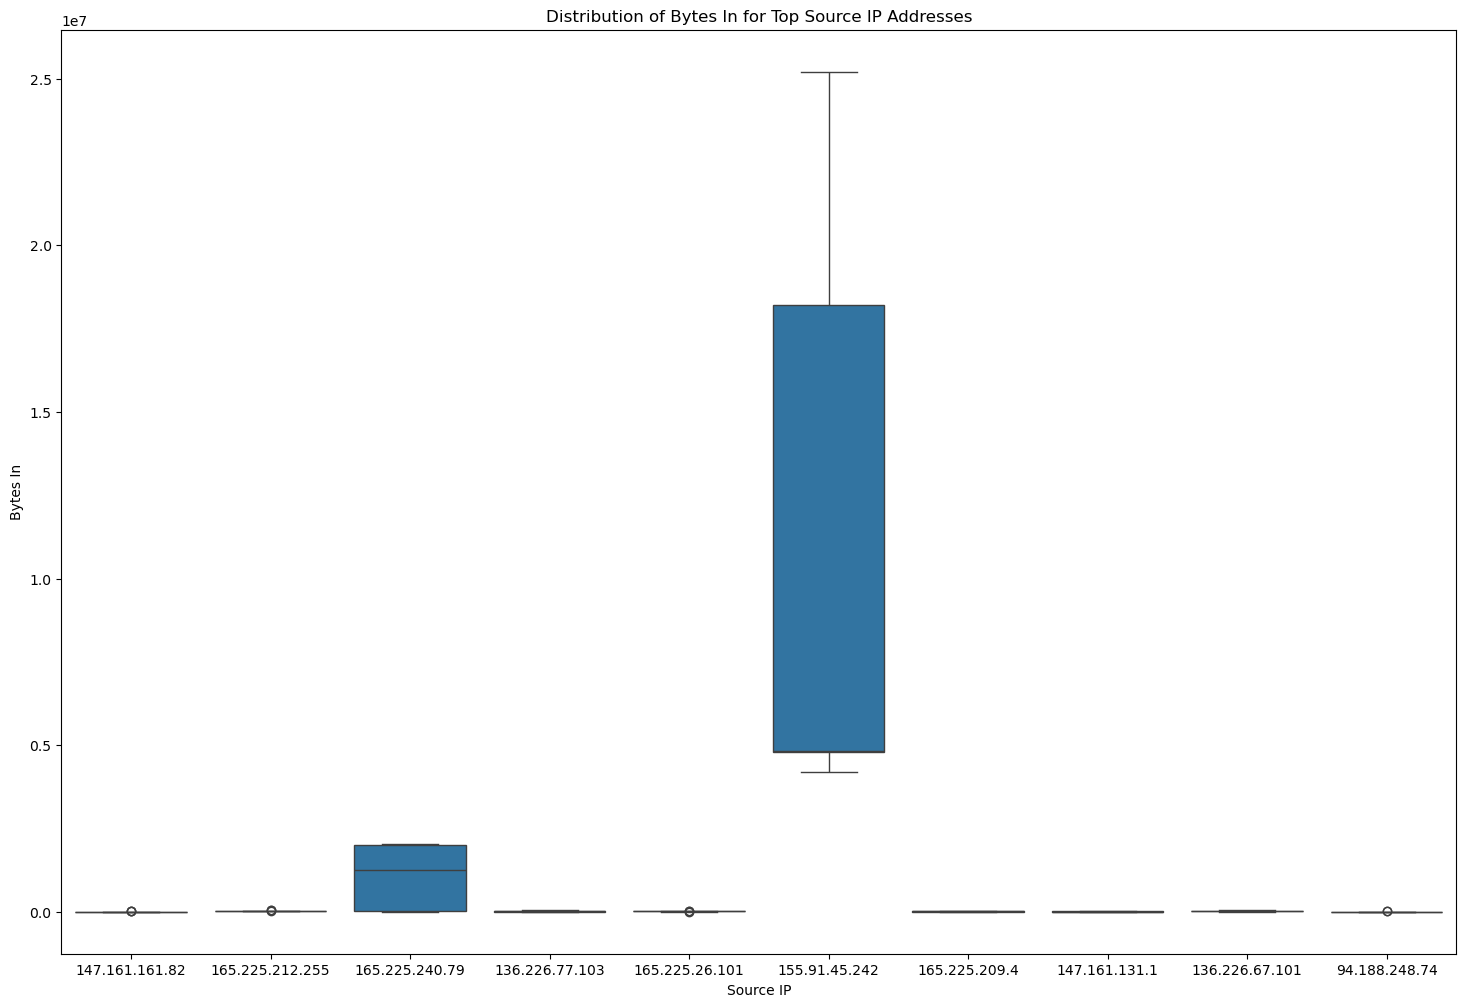

In [137]:
#Source IP Analysis
top_src_ips = df["src_ip"].value_counts().head(10).index
top_src_ips_data = df[df["src_ip"].isin(top_src_ips)]

plt.figure(figsize=(18,12))
sns.boxplot(x="src_ip", y="bytes_in", data=top_src_ips_data)
plt.xlabel("Source IP")
plt.ylabel("Bytes In")
plt.title("Distribution of Bytes In for Top Source IP Addresses")
plt.xticks(rotation=0)
plt.show()

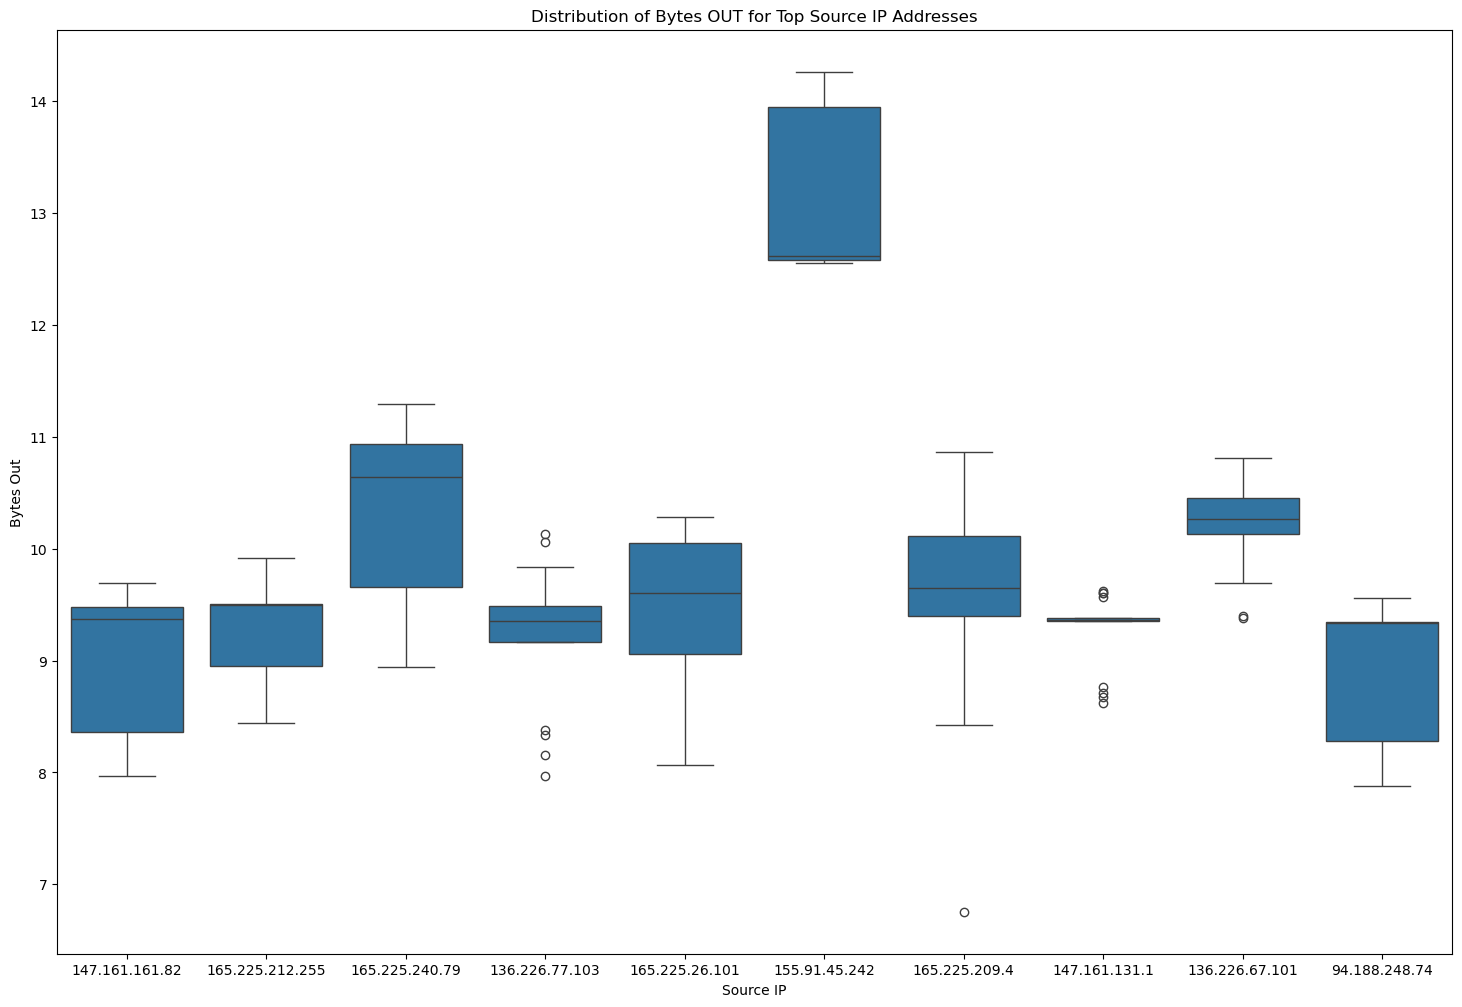

In [139]:
#Source IP Analysis
top_src_ips = df["src_ip"].value_counts().head(10).index
top_src_ips_data = df[df["src_ip"].isin(top_src_ips)]

plt.figure(figsize=(18,12))
sns.boxplot(x="src_ip", y="bytes_out", data=top_src_ips_data)
plt.xlabel("Source IP")
plt.ylabel("Bytes Out")
plt.title("Distribution of Bytes OUT for Top Source IP Addresses")
plt.xticks(rotation=0)
plt.show()

Distribution of Bytes In for Top Destination Ports

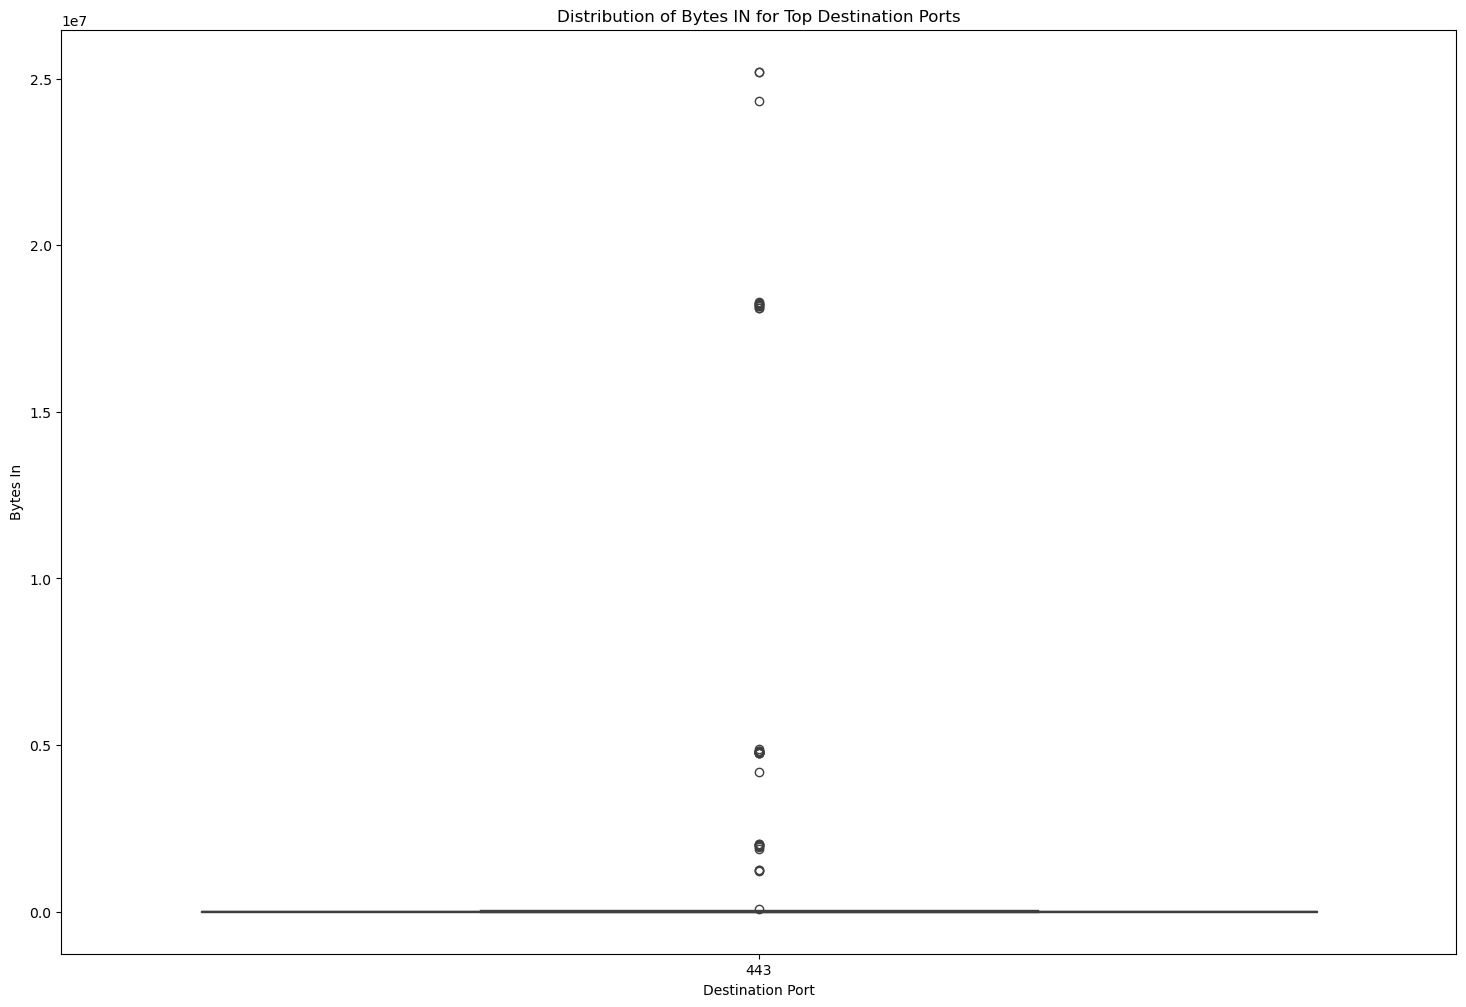

In [159]:
#SDestination Port Analysis
top_dst_ports = df["dst_port"].value_counts().head(10).index
top_dst_ports_data = df[df["dst_port"].isin(top_dst_ports)]

plt.figure(figsize=(18,12))
sns.boxplot(x="dst_port", y="bytes_in", data=top_dst_ports_data)
plt.xlabel("Destination Port")
plt.ylabel("Bytes In")
plt.title("Distribution of Bytes IN for Top Destination Ports")
plt.xticks(rotation=0)
plt.show()

Destinatio of Bytes Out For Top Destination Ports

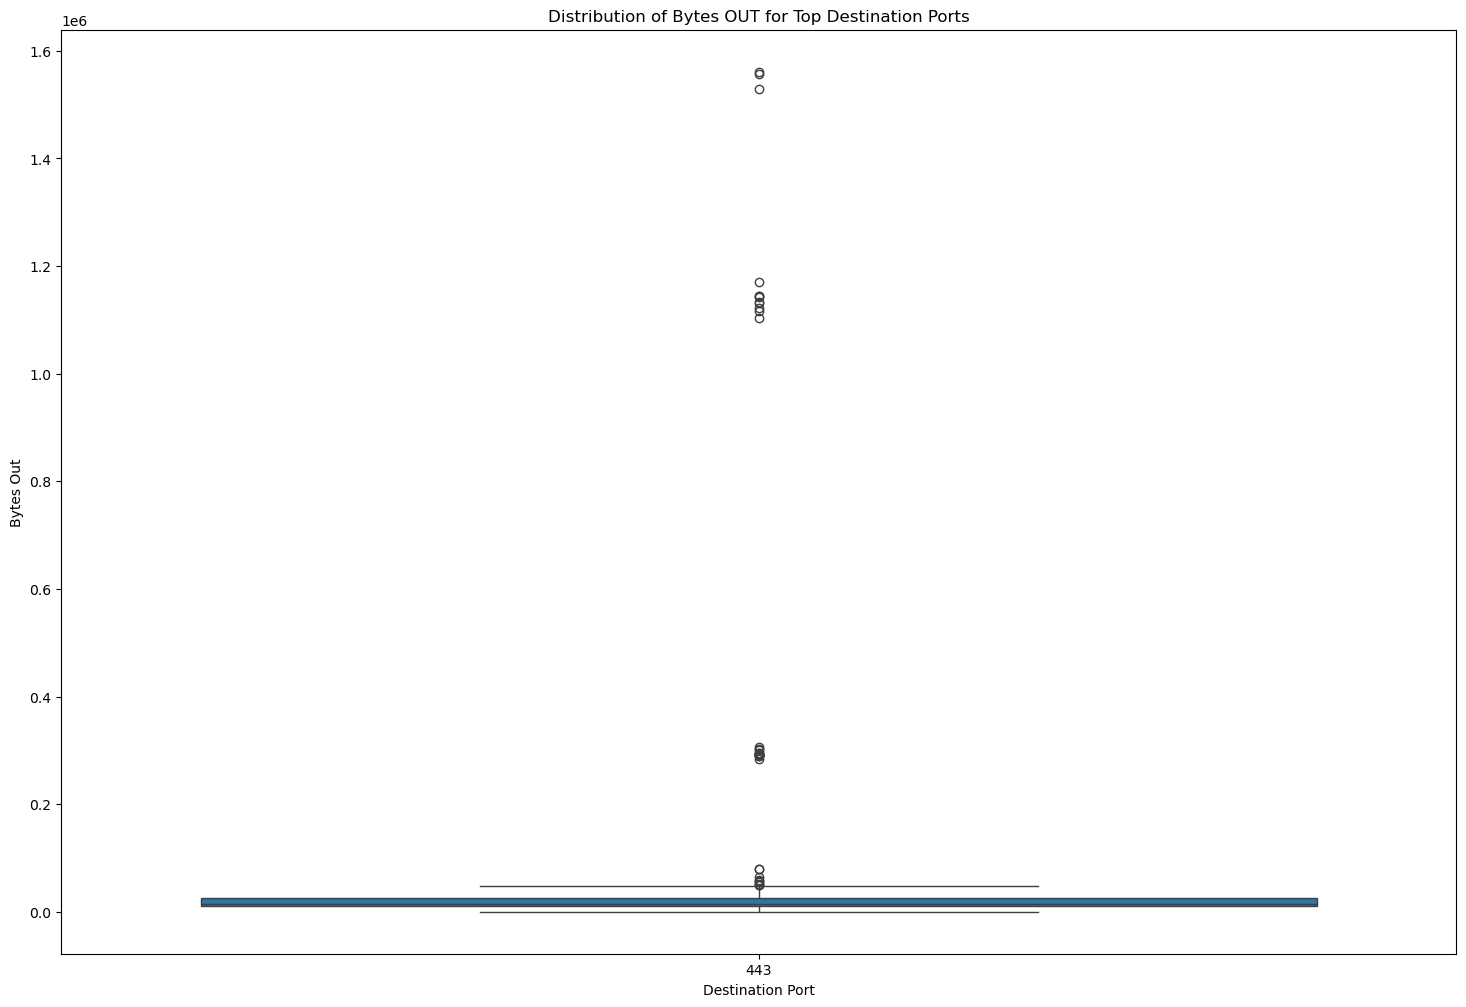

In [161]:
#Source IP Analysis
top_dst_ports = df["dst_port"].value_counts().head(10).index
top_dst_ports_data = df[df["dst_port"].isin(top_dst_ports)]

plt.figure(figsize=(18,12))
sns.boxplot(x="dst_port", y="bytes_out", data=top_dst_ports_data)
plt.xlabel("Destination Port")
plt.ylabel("Bytes Out")
plt.title("Distribution of Bytes OUT for Top Destination Ports")
plt.xticks(rotation=0)
plt.show()

COUNT OF SUSPICIOUS WEB INTERACTIONS OVER TIME

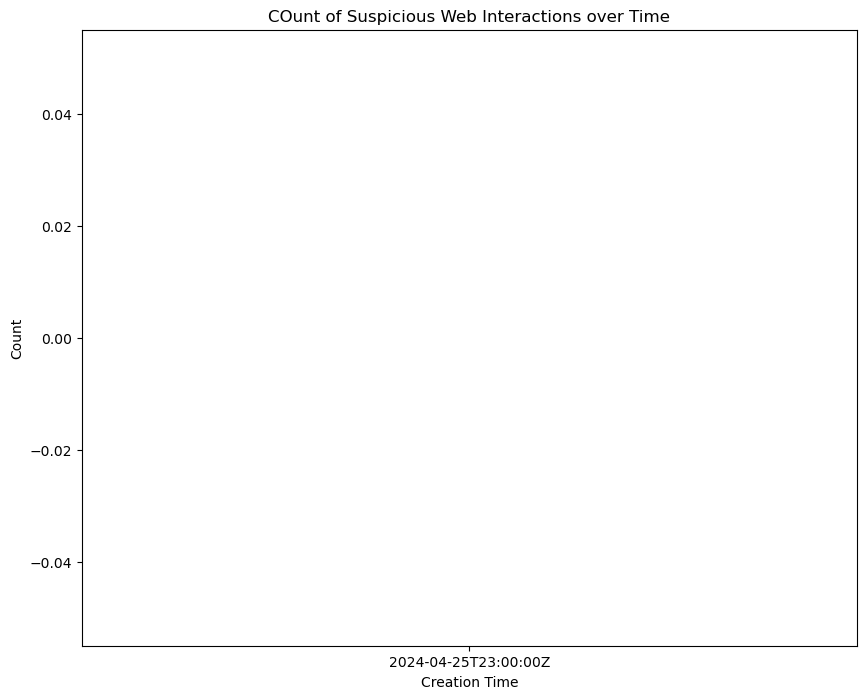

In [165]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df["creation_time"], y=df.groupby("creation_time").size(), color="red")
plt.xlabel("Creation Time")
plt.ylabel("Count")
plt.title("COunt of Suspicious Web Interactions over Time")
plt.xticks(rotation=0)
plt.show()

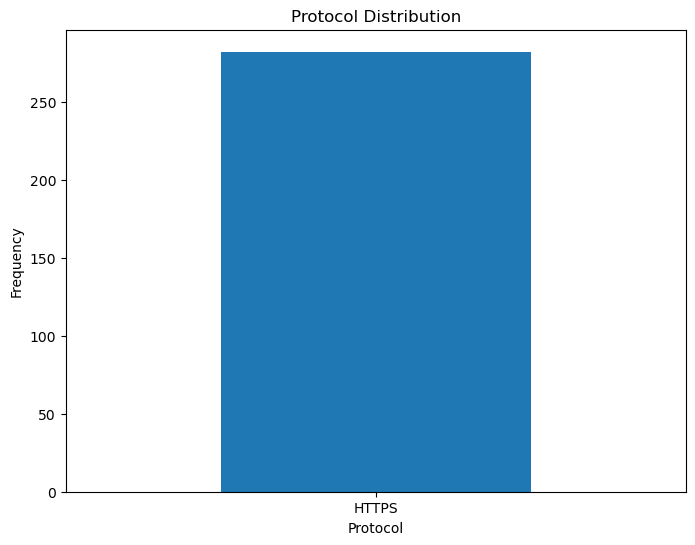

In [141]:
protocol_counts= df["protocol"].value_counts()
#plot
plt.figure(figsize=(8,6))
protocol_counts.plot(kind="bar")
plt.title("Protocol Distribution")
plt.xlabel("Protocol")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

Distribution of Bytes In For Each HTTP Response Code


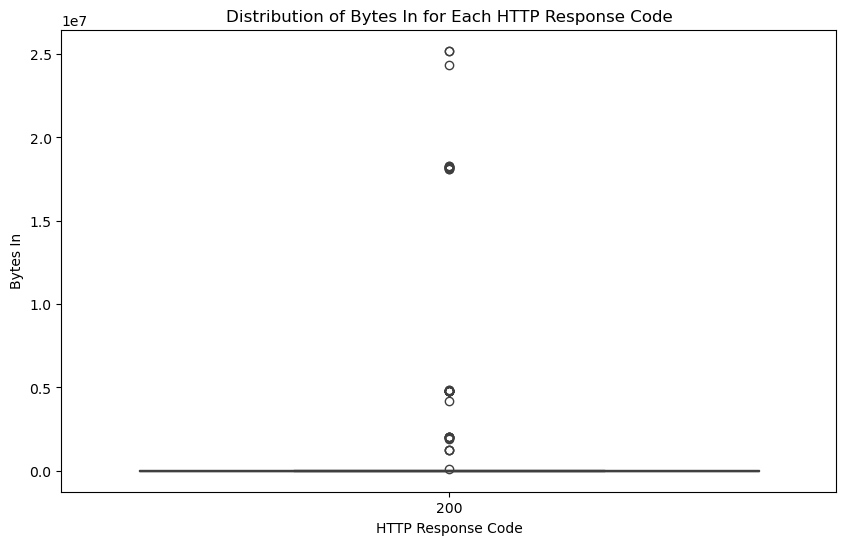

In [173]:
plt.figure(figsize=(10,6))
sns.boxplot(x="response.code", y="bytes_in", data=df)
plt.xlabel("HTTP Response Code")
plt.ylabel("Bytes In")
plt.title("Distribution of Bytes In for Each HTTP Response Code")
plt.xticks(rotation=0)
plt.show()

Distribution of Bytes In By Detection Type

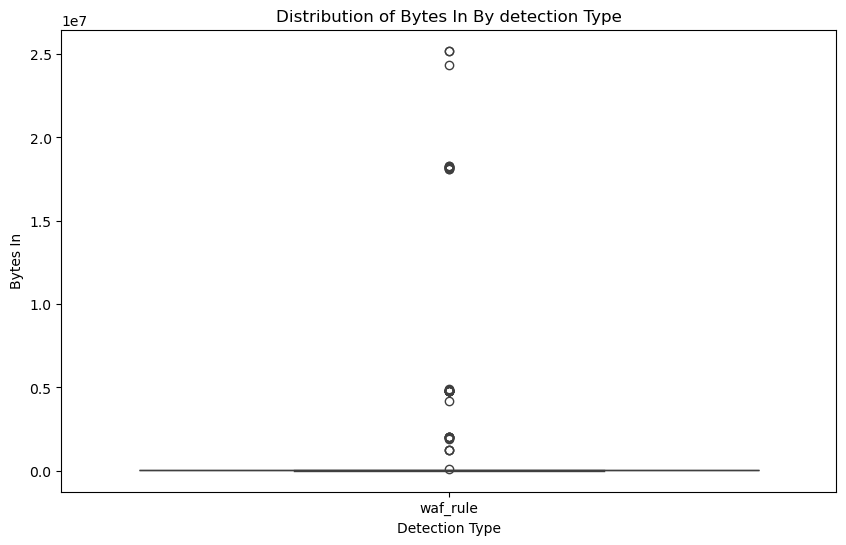

In [175]:
plt.figure(figsize=(10,6))
sns.boxplot(x="detection_types", y="bytes_in", data=df)
plt.xlabel("Detection Type")
plt.ylabel("Bytes In")
plt.title("Distribution of Bytes In By detection Type")
plt.xticks(rotation=0)
plt.show()

Distribution of Bytes In by Traffic Source

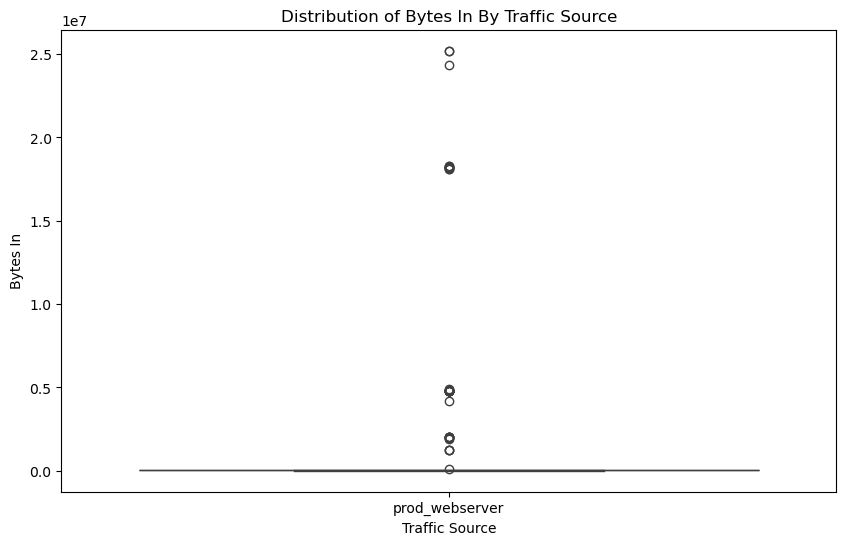

In [177]:
plt.figure(figsize=(10,6))
sns.boxplot(x="source.name", y="bytes_in", data=df)
plt.xlabel("Traffic Source")
plt.ylabel("Bytes In")
plt.title("Distribution of Bytes In By Traffic Source")
plt.xticks(rotation=0)
plt.show()